# **Mobile Price Classification**
# Classify mobile price range

1. Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

2. He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

3. Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

4. In this problem you do not have to predict actual price but a price range indicating how high the price is

In [40]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from dython.nominal import associations
import seaborn as sns

In [41]:
pip install dython

Note: you may need to restart the kernel to use updated packages.


# lets load the data set

In [42]:
train = pd.read_csv('../input/mobile-price-classification/train.csv')
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [43]:
test = pd.read_csv('../input/mobile-price-classification/test.csv')
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [44]:
# check train dataset for NaN
train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [45]:
# check test dataset for NaN
test.isna().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [46]:
train.shape  , test.shape

((2000, 21), (1000, 21))

In [47]:
print(f'train info is {train.info()}')
print()
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# Some Exploratory Data Analysis

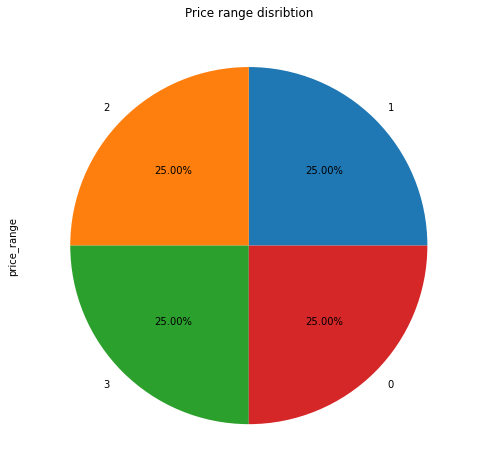

In [48]:
fig, ax = plt.subplots(figsize = (8,9))
train.price_range.value_counts().plot(kind= 'pie',autopct="%.2f%%")
ax.set(title = 'Price range disribtion');

In [49]:
train.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<AxesSubplot:>

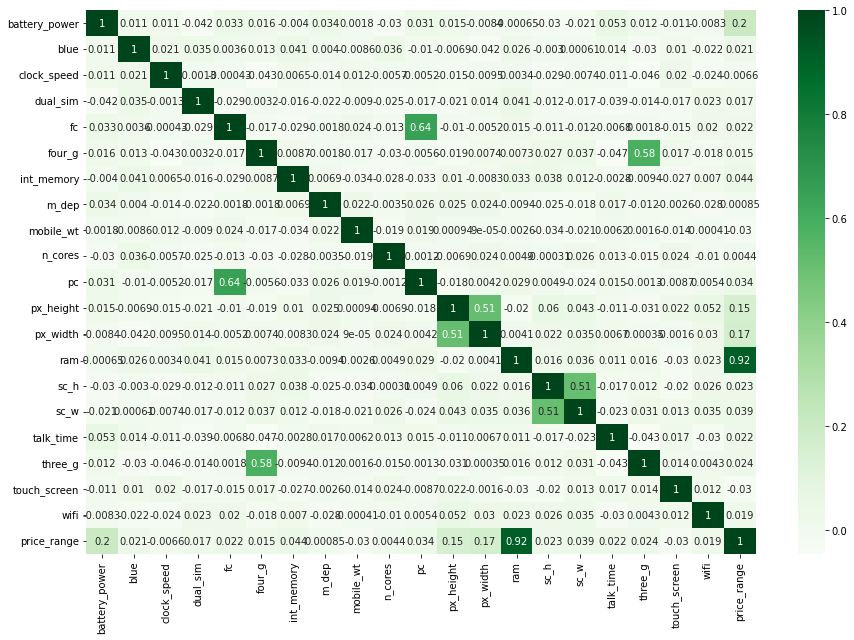

In [50]:
fig,ax = plt.subplots (figsize = (15,10))
sns.heatmap(train.corr(), annot = True,cmap='Greens')

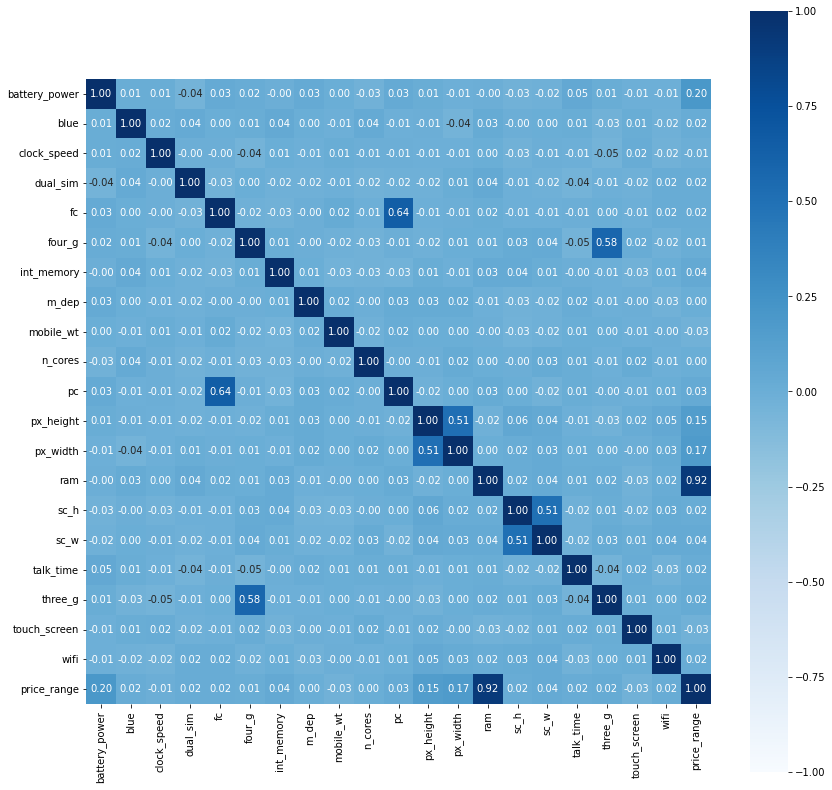

{'corr':                battery_power      blue  clock_speed  dual_sim        fc  \
 battery_power       1.000000  0.011252     0.011482 -0.041847  0.033334   
 blue                0.011252  1.000000     0.021419  0.035198  0.003593   
 clock_speed         0.011482  0.021419     1.000000 -0.001315 -0.000434   
 dual_sim           -0.041847  0.035198    -0.001315  1.000000 -0.029123   
 fc                  0.033334  0.003593    -0.000434 -0.029123  1.000000   
 four_g              0.015665  0.013443    -0.043073  0.003187 -0.016560   
 int_memory         -0.004004  0.041177     0.006545 -0.015679 -0.029133   
 m_dep               0.034085  0.004049    -0.014364 -0.022142 -0.001791   
 mobile_wt           0.001844 -0.008605     0.012350 -0.008979  0.023618   
 n_cores            -0.029727  0.036161    -0.005724 -0.024658 -0.013356   
 pc                  0.031441 -0.009952    -0.005245 -0.017143  0.644595   
 px_height           0.014901 -0.006872    -0.014523 -0.020875 -0.009990   
 px_

In [51]:
associations(dataset = train, figsize = (14,14),cmap = 'Blues')

# Splitting the training set with some useful features

In [52]:
X = train.loc[:,['battery_power','fc','four_g','pc','px_height','px_width','ram','sc_h','sc_w','three_g']]
y = train['price_range']
X

,battery_power,fc,four_g,pc,px_height,px_width,ram,sc_h,sc_w,three_g
0,842,1,0,2,20,756,2549,9,7,0
1,1021,0,1,6,905,1988,2631,17,3,1
2,563,2,1,6,1263,1716,2603,11,2,1
3,615,0,0,9,1216,1786,2769,16,8,1
4,1821,13,1,14,1208,1212,1411,8,2,1
...,...,...,...,...,...,...,...,...,...,...
1995,794,0,1,14,1222,1890,668,13,4,1
1996,1965,0,0,3,915,1965,2032,11,10,1
1997,1911,1,1,3,868,1632,3057,9,1,1
1998,1512,4,1,5,336,670,869,18,10,1


# Engineering fitting the model

In [53]:
#from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#seed
np.random.seed(42)


#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.2)

#instantiate and fit the mode
clf =  RandomForestClassifier(n_estimators = 120, n_jobs =1)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=120, n_jobs=1)

In [54]:
type(X_train) , type(y_train), X_train.shape, y_train.shape

(pandas.core.frame.DataFrame, pandas.core.series.Series, (1600, 10), (1600,))

# Predicting the model

In [55]:
# predit model
y_preds = clf.predict(X_test)
y_preds[:10]

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1])

# Testing the accuracy

In [56]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score, precision_score, recall_score, f1_score

In [57]:
print(f'Testing Accuracy score with inbuilt {clf.score(X_test, y_test)*100:0.2f}%')
print(f'Training Accuracy score with inbuilt {clf.score(X_train, y_train)*100:0.2f}%')
print(f"Accuracy is : {accuracy_score(y_test,y_preds)*100:0.2f}%")

Testing Accuracy score with inbuilt 91.50%
Training Accuracy score with inbuilt 100.00%
Accuracy is : 91.50%


# Confusion Matrix

In [58]:
confusion_matrix(y_test,y_preds)
pd.DataFrame(confusion_matrix(y_test,y_preds))

,0,1,2,3
0,100,5,0,0
1,3,85,3,0
2,0,5,82,5
3,0,0,13,99


# Classification Report

In [59]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       105
           1       0.89      0.93      0.91        91
           2       0.84      0.89      0.86        92
           3       0.95      0.88      0.92       112

    accuracy                           0.92       400
   macro avg       0.91      0.92      0.91       400
weighted avg       0.92      0.92      0.92       400



In [60]:
f1_score(y_test,y_preds,average='weighted')

0.9155269361368681

# Tunning the model to improve - Randomized SearchCV

In [61]:
# Randomized Search CV Tunining

# import hyperparameter tuning with randomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsClassifier

# instantiate KNeighborsClassifier
rfc =KNeighborsClassifier()

params = {'algorithm': ['auto'],
 'leaf_size': [20],
 'metric': ['minkowski'],
 'metric_params': [None],
 'n_jobs': [1,100,500,1,200],
 'n_neighbors': [5,30],
 'p': [2],
 'weights': ['uniform']}

random = RandomizedSearchCV (rfc, param_distributions=params, cv=10,
 n_iter = 5, scoring= "neg_mean_absolute_error",verbose= 2, random_state=42,
 n_jobs=-1, return_train_score=True)


random.fit(X_train, y_train)

print("Best hyper parameter:", random.best_params_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Best hyper parameter: {'weights': 'uniform', 'p': 2, 'n_neighbors': 5, 'n_jobs': 200, 'metric_params': None, 'metric': 'minkowski', 'leaf_size': 20, 'algorithm': 'auto'}


In [62]:
y_pred2 = random.predict(X_test)

In [63]:
# Tuned Accuracy
accuracy_score(y_test, y_pred2)

0.945

In [64]:
random.predict(X_test)[:10]

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1])

In [65]:
print(f'Accuracy score is {accuracy_score(y_test,y_pred2)*100:.2f}%')

Accuracy score is 94.50%


# Testing and fitting our model unto the test dataset

In [66]:
# we will drop the id column and fit it back later
test_model = random.predict(test.loc[:,['battery_power','fc','four_g','pc','px_height','px_width','ram','sc_h','sc_w','three_g']])
test_model[:10]

array([3, 3, 3, 3, 1, 3, 3, 1, 3, 0])

In [67]:
# converting the prediction to a df
prediction = pd.DataFrame(test_model,columns = ['prediction'])

In [68]:
# lets create a df that models the test dataset and the predictions

In [69]:
test_data_model = pd.concat([test,prediction],ignore_index = False, axis = 1)

In [70]:
test_data_model

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,prediction
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,3
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,3
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,3
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,644,913,2121,14,8,15,1,1,0,2
996,997,609,0,1.8,1,0,0,13,0.9,186,...,1152,1632,1933,8,1,19,0,1,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,477,825,1223,5,0,14,1,0,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,38,832,2509,15,11,6,0,1,0,2


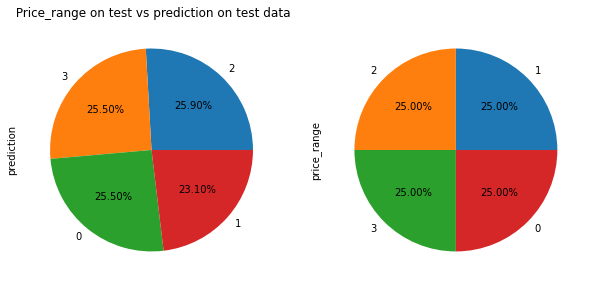

In [71]:
fig,(ax1, ax2) = plt.subplots(figsize = (10,10),nrows=1,ncols =2)
test_data_model.prediction.value_counts().plot(kind= 'pie',autopct="%.2f%%",ax=ax1)
train.price_range.value_counts().plot(kind= 'pie',autopct="%.2f%%",ax=ax2);
ax1.set(title =' Price_range on test vs prediction on test data');

In [72]:
from sklearn.metrics import roc_curve

# make predictions
y_prob = random.predict_proba(X_test)
y_prob[:10]

array([[1. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. ],
       [0. , 1. , 0. , 0. ],
       [0. , 0. , 0. , 1. ],
       [0. , 1. , 0. , 0. ],
       [0. , 1. , 0. , 0. ],
       [0. , 0.2, 0.8, 0. ],
       [1. , 0. , 0. , 0. ],
       [0. , 0. , 0.2, 0.8],
       [0. , 0.8, 0.2, 0. ]])

In [73]:
# now we want to get the only positive 
y_prob_positive = y_prob [:,1]
y_prob_positive[:10]

array([0. , 0. , 1. , 0. , 1. , 1. , 0.2, 0. , 0. , 0.8])

### 1. Testing Accuracy score with inbuilt 91.50% with RandomForestClassifier
### 2. Training Accuracy score with inbuilt 100.00%
### 3 .Accuracy_score is : 94.5% with improved tuning with KNeighborsClassifier and RandomSearchCV

# Saving the model

In [74]:

from joblib import dump, load

# Save the model
dump(random, filename ='mobile_phone_price_predict')


['mobile_phone_price_predict']